In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 그래프 음수 출력
matplotlib.rcParams['axes.unicode_minus'] = False   

In [9]:
def f(x):
    return 1/2*x+np.sqrt(np.max(x, 0)) - np.cos(x) + 2
def f_hat(x, w):
    # d차 다항식
    d = len(w)-1
    return np.sum(w*np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

In [11]:
observable_n = 1000
sigma_epsilon = 1
observable_x_max = 3

In [5]:
observable_x = observable_x_max*(2*np.random.rand(observable_n)-1)
observable_epsilon = sigma_epsilon*np.random.randn(observable_n)
observable_y = f(observable_x) + observable_epsilon
x_range = np.linspace(-observable_x_max, observable_x_max, observable_n)

In [6]:
test_x = 3.2
test_y = f(test_x)+sigma_epsilon*np.random.randn()

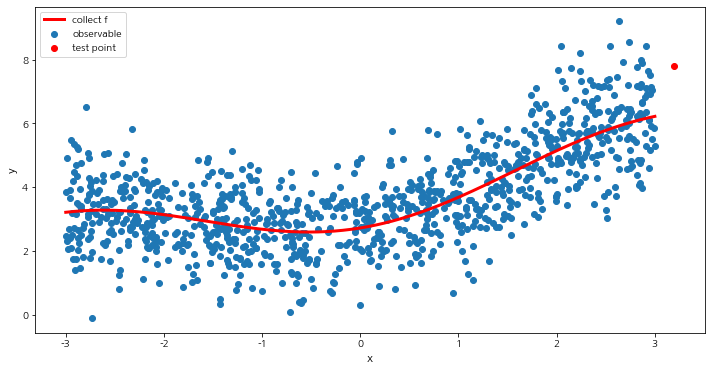

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(observable_x, observable_y, label="observable")
plt.scatter(test_x, test_y, c='r', label='test point')
plt.plot(x_range, f(x_range), color='r', linewidth=3.0, label="collect f")
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.xticks(np.arange(-observable_x_max, observable_x_max+1))
plt.legend()
plt.show()

In [31]:
train_n = int(2/100*observable_n)
d_list = [1, 2, 3, 4]

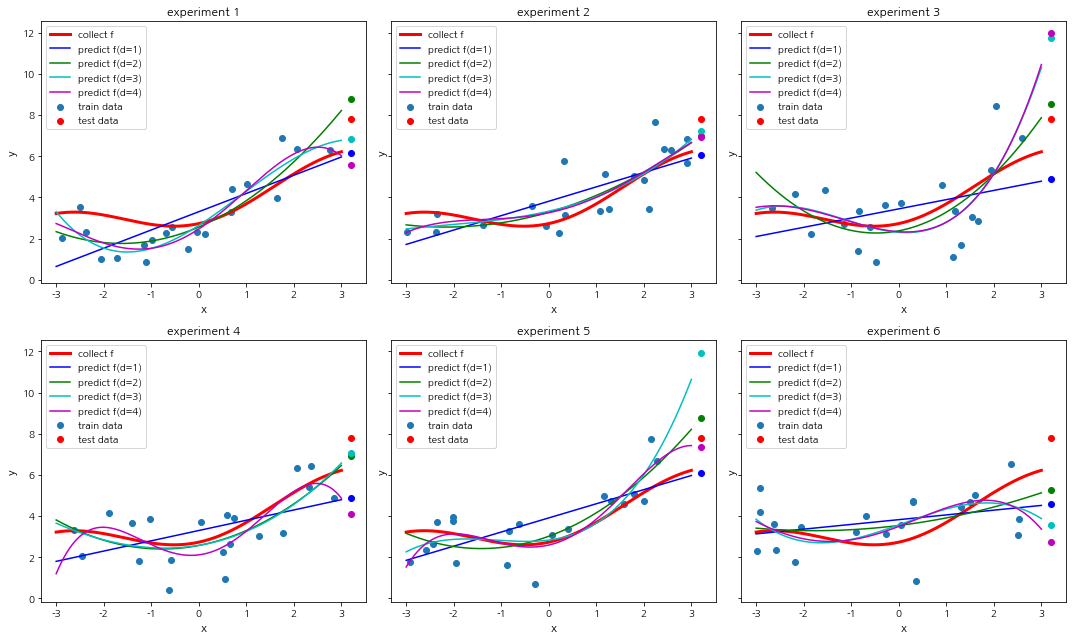

In [32]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
num_experiment = 6
num_col = 3
num_row = num_experiment//3
cnt = 1
color_list = ["b", "g", "c", "m", "y", "k", "w"]
for r in range(num_row):
    for c in range(num_col):
        idx = np.random.permutation(observable_n)[:train_n]
        train_x, train_y = observable_x[idx], observable_y[idx]
        w = []
        for d in d_list:
            w.append(np.polyfit(train_x, train_y, d))
        ax[r, c].scatter(train_x, train_y, label="train data")
        ax[r, c].scatter(test_x, test_y, color='r', label="test data")
        ax[r, c].plot(x_range, f(x_range), color='r', linewidth=3.0, label="collect f")
        for k in range(len(w)):
            ax[r, c].plot(x_range, f_hat(x_range, w[k]), color=color_list[k], label="predict f(d={})".format(d_list[k]))    
            ax[r, c].scatter(test_x, f_hat(test_x, w[k]), color=color_list[k])
        ax[r, c].set_xlabel('x', size=12)
        ax[r, c].set_ylabel('y', size=12)
        ax[r, c].title.set_text("experiment {}".format(cnt))
        cnt += 1
        ax[r,c].legend()
plt.tight_layout()
plt.show()
    

In [50]:
num_experiment = 10000
train_n = int(observable_n*2/100)
predict_dict = np.zeros((num_experiment, len(d_list)))
for i in range(num_experiment):
    idx = np.random.permutation(observable_n)[:train_n]
    train_x, train_y = observable_x[idx], observable_y[idx]
    for j in range(len(d_list)):
        d = d_list[j]
        w = np.polyfit(train_x, train_y, d)
        predict_dict[i][j] = f_hat(test_x, w)

predict_mean = np.mean(predict_dict, axis=0)
predict_std = np.std(predict_dict, axis=0)

d: 1 f(test_x): 6.39 bias^2: 1.04 var: 0.41
d: 2 f(test_x): 6.39 bias^2: 0.73 var: 0.9
d: 3 f(test_x): 6.39 bias^2: 0.74 var: 2.92
d: 4 f(test_x): 6.39 bias^2: 0.0 var: 11.11


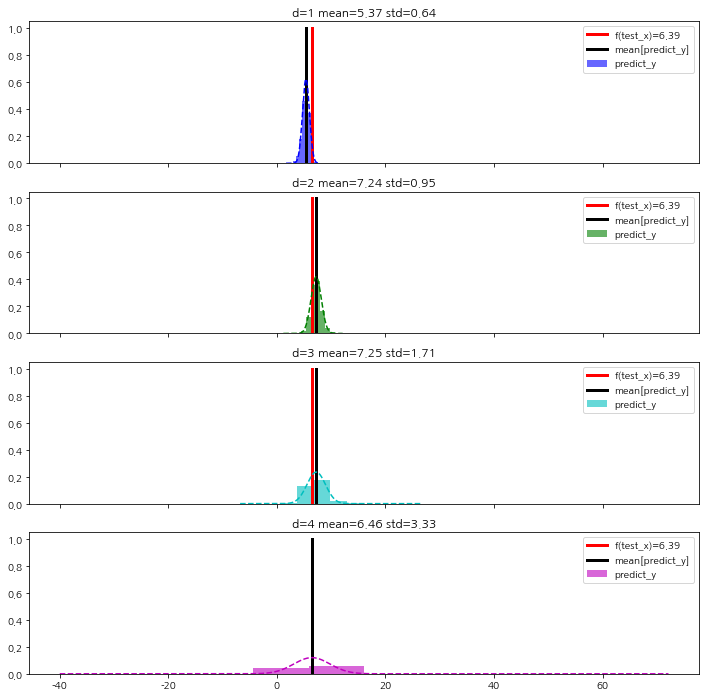

In [68]:
fig, ax = plt.subplots(len(d_list), 1, sharex=True, figsize=(12, 12))
for i in range(len(d_list)):
    ax[i].hist(predict_dict[:, i], density=True, color=color_list[i], alpha=0.6, label="predict_y")
    
    ax[i].plot([f(test_x), f(test_x)], [0, 1], 'r', linewidth=3.0, label="f(test_x)={}".format(round(f(test_x), 2)))
    ax[i].plot([predict_mean[i], predict_mean[i]], [0, 1], c='k', linewidth=3.0, label="mean[predict_y]")
    ax[i].title.set_text('d={} mean={} std={}'.format(d_list[i], round(predict_mean[i],2), round(predict_std[i],2)))
    
    xlim = ax[i].get_xlim()
    x_range = np.linspace(xlim[0], xlim[1], 1000)
    ax[i].plot(x_range, stats.norm.pdf(x_range, predict_mean[i], predict_std[i]), color=color_list[i], ls='--')
    ax[i].legend()
    print("d: {} f(test_x): {} bias^2: {} var: {}".format(d_list[i], round(f(test_x), 2), round((predict_mean[i]-f(test_x))**2, 2), round(predict_std[i]**2, 2)))
plt.show()
    